In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [4]:
paths = []
labels = []

for dirname, _, filenames in os.walk('emotional_speech_set_data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1];
        label = label.split('.')[0]
        labels.append(label.lower())

In [5]:
df = pd.DataFrame()
df['Path'] = paths
df['Emotions'] = labels
df.head()

,Path,Emotions
0,emotional_speech_set_data\OAF_angry\OAF_back_a...,angry
1,emotional_speech_set_data\OAF_angry\OAF_bar_an...,angry
2,emotional_speech_set_data\OAF_angry\OAF_base_a...,angry
3,emotional_speech_set_data\OAF_angry\OAF_bath_a...,angry
4,emotional_speech_set_data\OAF_angry\OAF_bean_a...,angry


In [6]:
df['Emotions'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: Emotions, dtype: int64

<AxesSubplot: xlabel='Emotions', ylabel='count'>

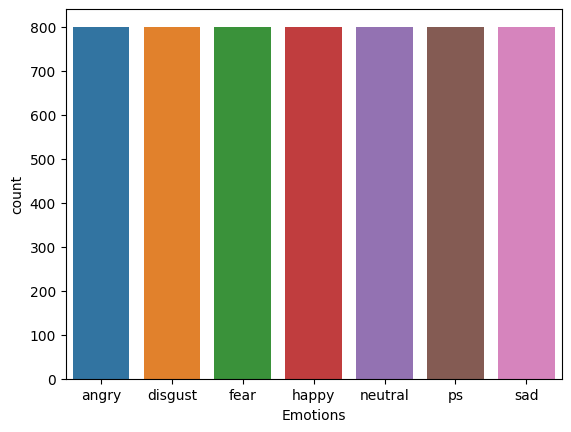

In [7]:
df['Emotions'] = df['Emotions'].astype('category')
sns.countplot(x='Emotions', data=df)

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

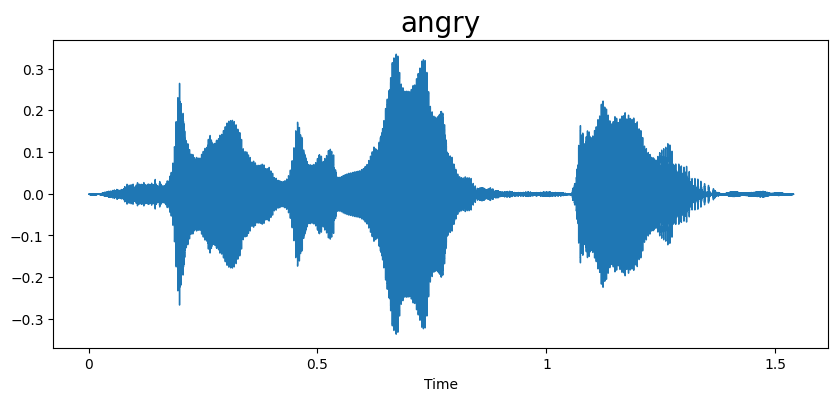

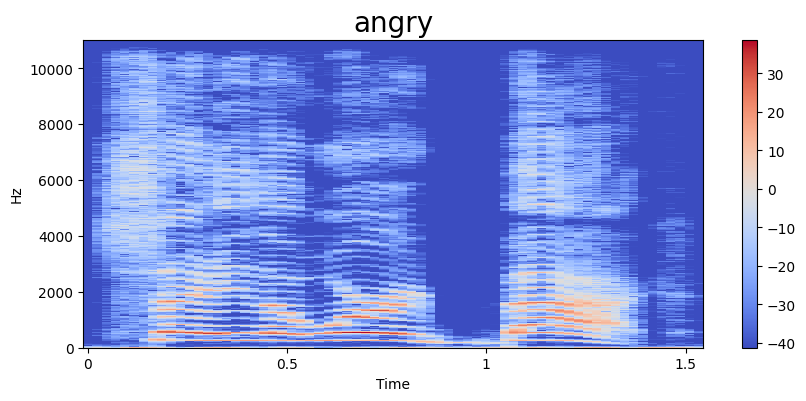

In [8]:
emotion = 'angry'
path = df['Path'][df['Emotions']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

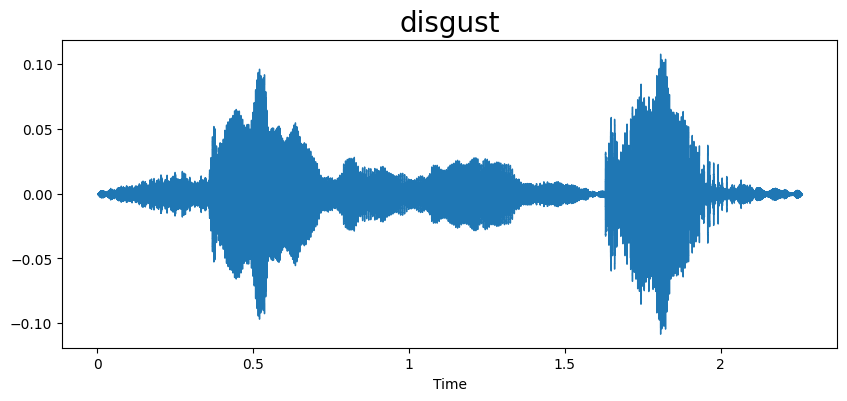

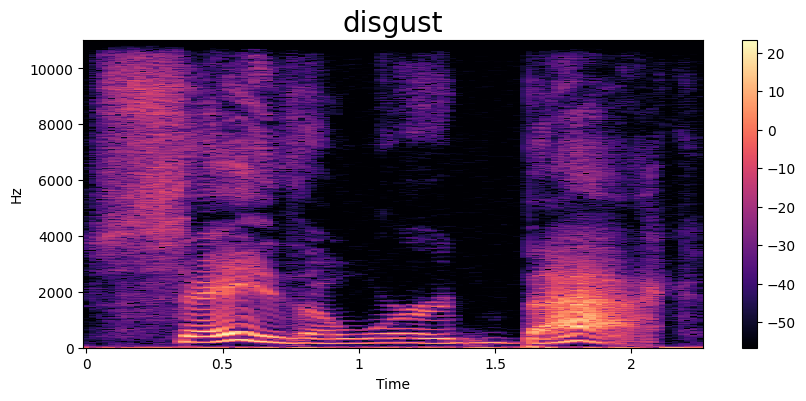

In [9]:
emotion = 'disgust'
path = df['Path'][df['Emotions']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)


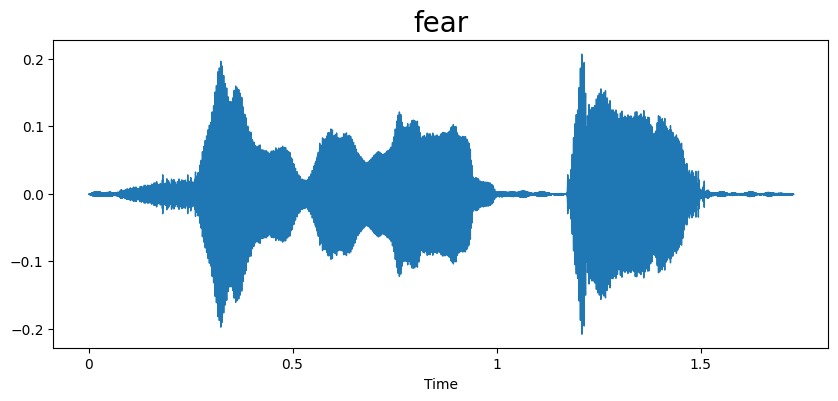

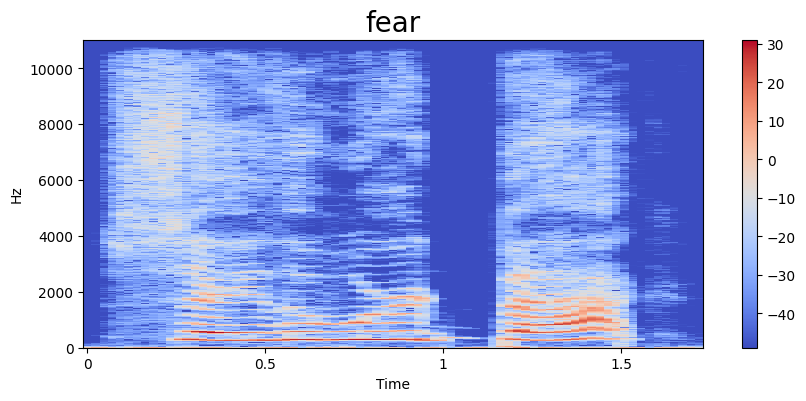

In [10]:
emotion = 'fear'
path = df['Path'][df['Emotions']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

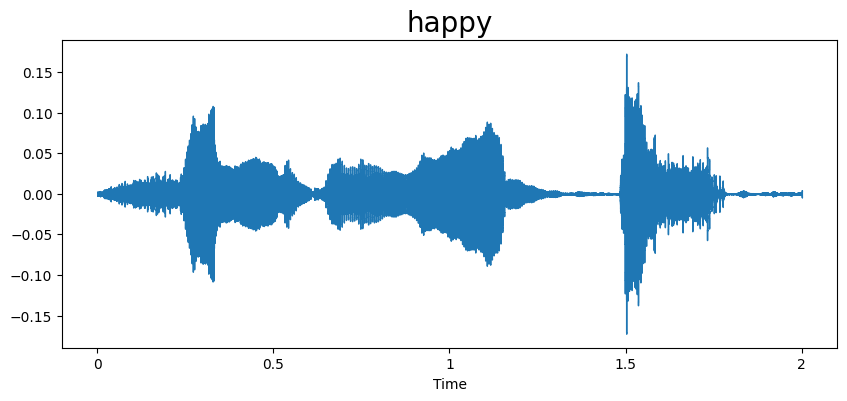

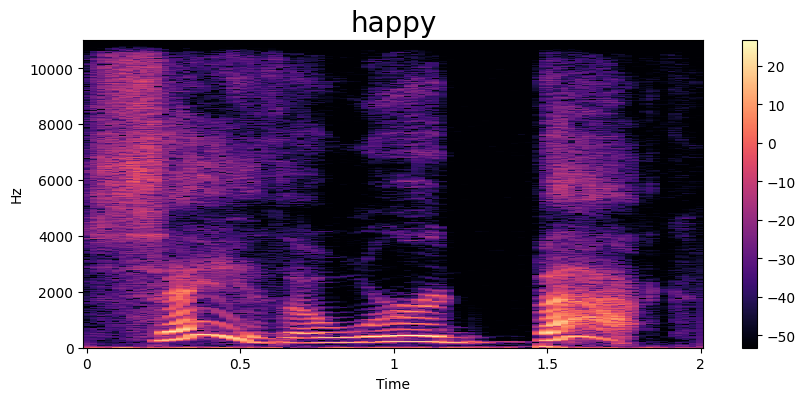

In [11]:
emotion = 'happy'
path = df['Path'][df['Emotions']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

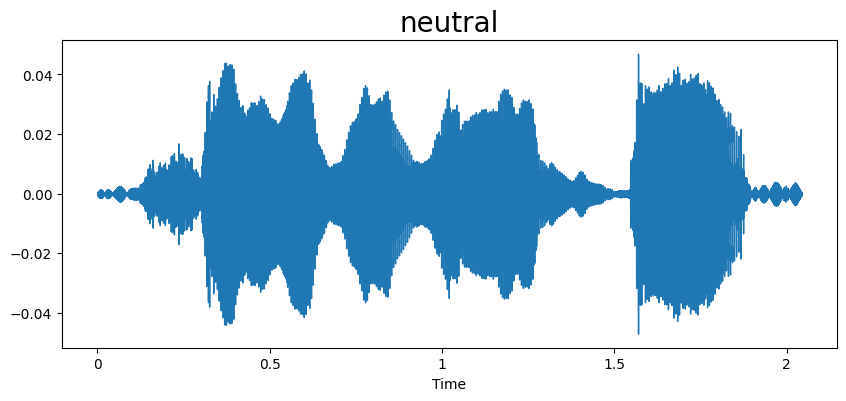

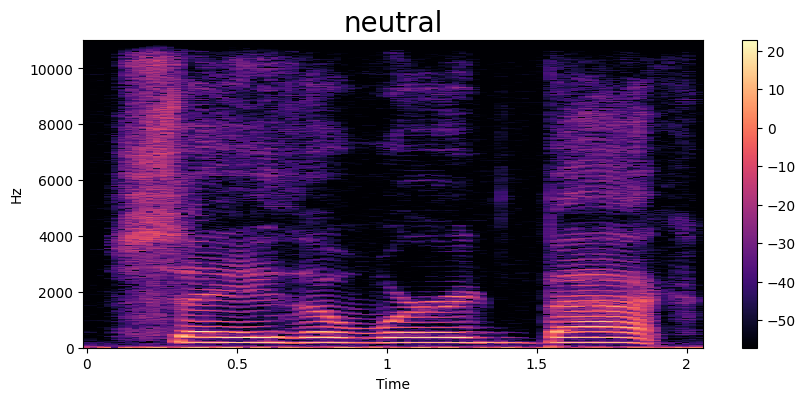

In [12]:
emotion = 'neutral'
path = df['Path'][df['Emotions']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

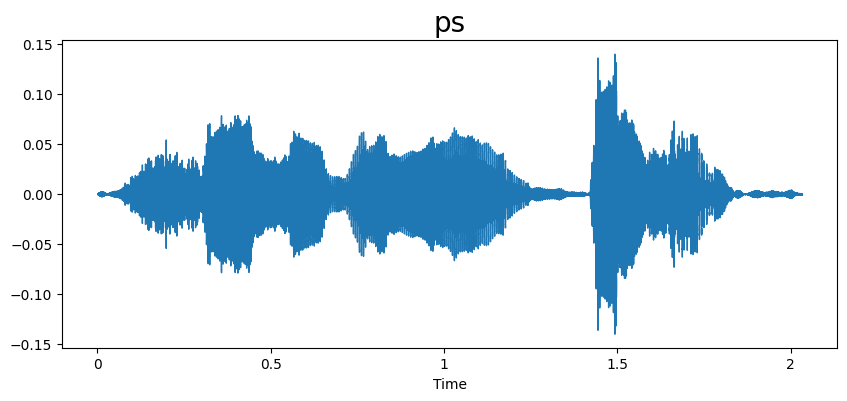

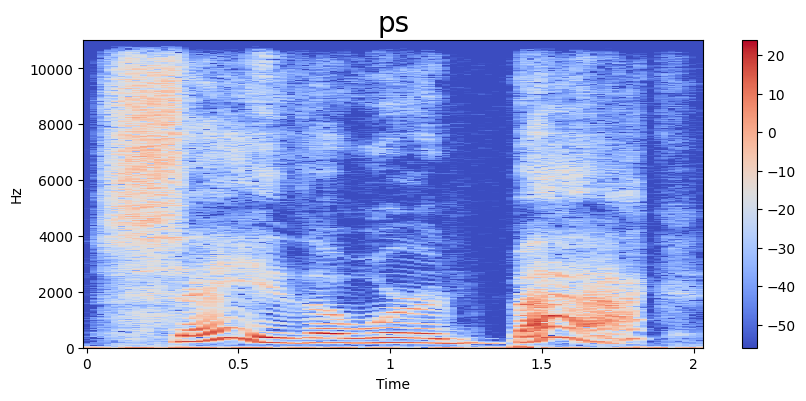

In [13]:
emotion = 'ps'
path = df['Path'][df['Emotions']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

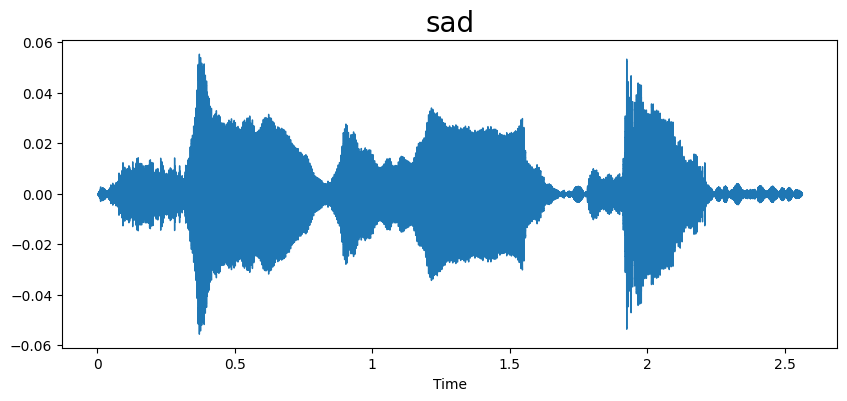

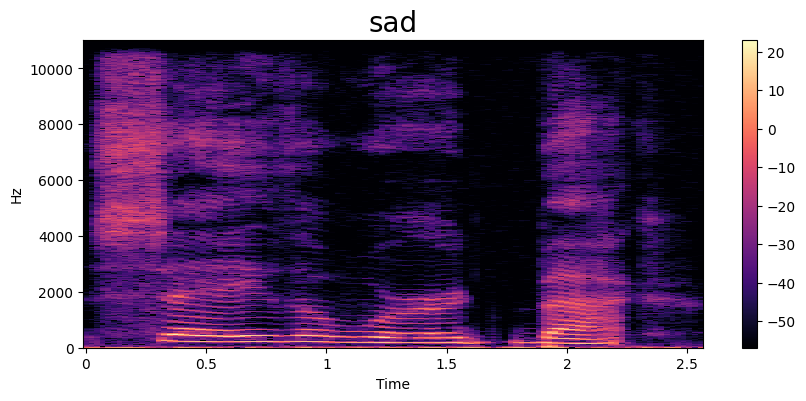

In [14]:
emotion = 'sad'
path = df['Path'][df['Emotions']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [9]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [10]:
X_mfcc = df['Path'].apply(lambda x : extract_mfcc(x))

In [11]:
type(X_mfcc)

pandas.core.series.Series

In [12]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [13]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['Emotions']])
y = y.toarray()


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4480, 40, 1), (1120, 40, 1), (4480, 7), (1120, 7))

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [17]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
7/7 [==============================] - 5s 343ms/step - loss: 1.8850 - accuracy: 0.2818 - val_loss: 1.7532 - val_accuracy: 0.4833
Epoch 2/100
7/7 [==============================] - 2s 252ms/step - loss: 1.6646 - accuracy: 0.4453 - val_loss: 1.4438 - val_accuracy: 0.5938
Epoch 3/100
7/7 [==============================] - 2s 260ms/step - loss: 1.3516 - accuracy: 0.5279 - val_loss: 1.0544 - val_accuracy: 0.6596
Epoch 4/100
7/7 [==============================] - 2s 244ms/step - loss: 1.0546 - accuracy: 0.6071 - val_loss: 0.7987 - val_accuracy: 0.7355
Epoch 5/100
7/7 [==============================] - 2s 219ms/step - loss: 0.8705 - accuracy: 0.6521 - val_loss: 0.6054 - val_accuracy: 0.8203
Epoch 6/100
7/7 [==============================] - 1s 184ms/step - loss: 0.6993 - accuracy: 0.7480 - val_loss: 0.4250 - val_accuracy: 0.8895
Epoch 7/100
7/7 [==============================] - 1s 182ms/step - loss: 0.5338 - accuracy: 0.8178 - val_loss: 0.3029 - val_accuracy: 0.9085
Epoch 8/100
7

Epoch 59/100
7/7 [==============================] - 3s 393ms/step - loss: 0.0162 - accuracy: 0.9958 - val_loss: 0.0540 - val_accuracy: 0.9833
Epoch 60/100
7/7 [==============================] - 3s 382ms/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.0510 - val_accuracy: 0.9866
Epoch 61/100
7/7 [==============================] - 2s 295ms/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.0493 - val_accuracy: 0.9877
Epoch 62/100
7/7 [==============================] - 1s 208ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0341 - val_accuracy: 0.9900
Epoch 63/100
7/7 [==============================] - 1s 172ms/step - loss: 0.0151 - accuracy: 0.9941 - val_loss: 0.0478 - val_accuracy: 0.9888
Epoch 64/100
7/7 [==============================] - 1s 177ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.0527 - val_accuracy: 0.9900
Epoch 65/100
7/7 [==============================] - 1s 172ms/step - loss: 0.0117 - accuracy: 0.9972 - val_loss: 0.0534 - val_accuracy: 0.9877
Epoch 

In [18]:
y_pred = model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
print("Testing accuracy:", accuracy)

35/35 [==============================] - 1s 16ms/step - loss: 0.0298 - accuracy: 0.9937
Testing accuracy: 0.9937499761581421


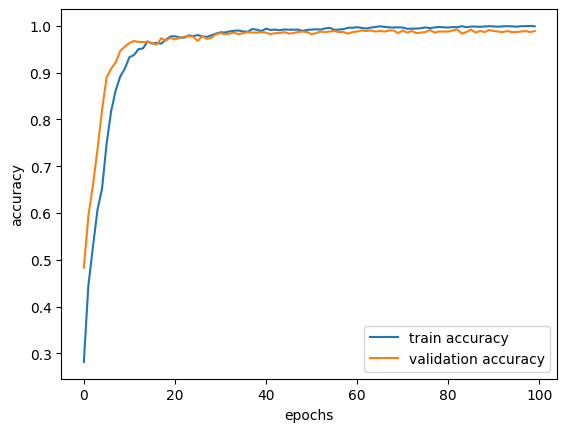

In [19]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


[[175   0   0   0   0   1   0]
 [  1 152   0   0   0   0   0]
 [  0   0 149   0   0   0   0]
 [  0   0   0 142   0   1   0]
 [  0   0   0   0 175   0   0]
 [  0   1   0   3   0 161   0]
 [  0   0   0   0   0   0 159]]


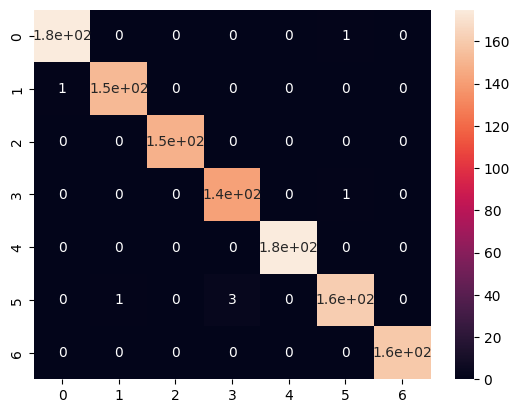

In [20]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print(confusion_matrix)

ax = sns.heatmap(confusion_matrix, annot=True)



In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

macro_precision = precision_score(y_test_labels, y_pred_labels, average='macro')  
macro_recall = recall_score(y_test_labels, y_pred_labels, average='macro')  
macro_f1 = f1_score(y_test_labels, y_pred_labels, average='macro')

micro_precision = precision_score(y_test_labels, y_pred_labels, average='micro')  
micro_recall = recall_score(y_test_labels, y_pred_labels, average='micro')  
micro_f1 = f1_score(y_test_labels, y_pred_labels, average='micro')

print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)
print("Macro F1 score:", macro_f1)

print("Micro Precision:", micro_precision)
print("Micro Recall:", micro_recall)
print("Micro F1 score:", micro_f1)

Macro Precision: 0.9935460914690061
Macro Recall: 0.9937924004100475
Macro F1 score: 0.9936572374700063
Micro Precision: 0.99375
Micro Recall: 0.99375
Micro F1 score: 0.99375
